In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers

2024-03-22 12:10:46.979035: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-22 12:10:46.979174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-22 12:10:47.129998: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
mnist_train = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
mnist_test = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_test.csv')

In [4]:
mnist_train.shape, mnist_test.shape

((60000, 785), (10000, 785))

In [5]:
train_images = mnist_train.iloc[:, 1:]
train_labels = mnist_train.iloc[:, 0]
test_images = mnist_test.iloc[:, 1:]
test_labels = mnist_test.iloc[:, 0]

In [6]:
train_images.shape, train_labels.shape

((60000, 784), (60000,))

In [7]:
test_images.shape, test_labels.shape

((10000, 784), (10000,))

In [8]:
train_images.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_labels.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [10]:
test_images.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test_labels.head()

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64

In [12]:
train_images.loc[0], train_labels.loc[0]

(1x1      0
 1x2      0
 1x3      0
 1x4      0
 1x5      0
         ..
 28x24    0
 28x25    0
 28x26    0
 28x27    0
 28x28    0
 Name: 0, Length: 784, dtype: int64,
 5)

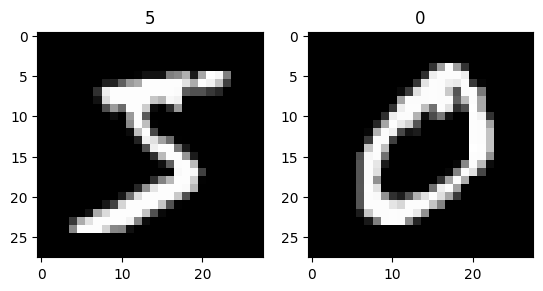

In [13]:
# Visualize the first and second images
plt.subplot(1, 2, 1)  # Subplot 1
plt.imshow(train_images.loc[0].values.reshape(28, 28), cmap='gray')
plt.title(f'{train_labels.loc[0]}')

plt.subplot(1, 2, 2)  # Subplot 2
plt.imshow(train_images.loc[1].values.reshape(28, 28), cmap='gray')
plt.title(f'{train_labels.loc[1]}')

plt.show()

In [14]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [15]:
# Add a channel dimension
train_images = train_images.values.reshape(-1, 28, 28, 1)
test_images = test_images.values.reshape(-1, 28, 28, 1)

In [16]:
# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(10000).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

In [17]:
# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

In [18]:
# Compile the model
model.compile(optimizer='Adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
# Train the model
history = model.fit(train_ds, epochs=25)

Epoch 1/25
 68/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6098 - loss: 1.3705

I0000 00:00:1711109470.977246      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711109470.993862      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8971 - loss: 0.3574
Epoch 2/25
 71/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9827 - loss: 0.0702

W0000 00:00:1711109474.555421      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9849 - loss: 0.0524
Epoch 3/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9889 - loss: 0.0343
Epoch 4/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9924 - loss: 0.0247
Epoch 5/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9944 - loss: 0.0183
Epoch 6/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9951 - loss: 0.0151
Epoch 7/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9968 - loss: 0.0101
Epoch 8/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9973 - loss: 0.0085
Epoch 9/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9988 - loss: 0.0046
Epoch 10/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9976 - loss: 0.0069
Epoch 11/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9979 - loss: 0.0057
Epoch 12/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9974 - loss: 0.0071
Epoch 13/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accurac

In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print('\nTest accuracy:', test_acc)

W0000 00:00:1711109525.351913      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


157/157 - 1s - 9ms/step - accuracy: 0.9878 - loss: 0.0601

Test accuracy: 0.9878000020980835


W0000 00:00:1711109526.219362      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


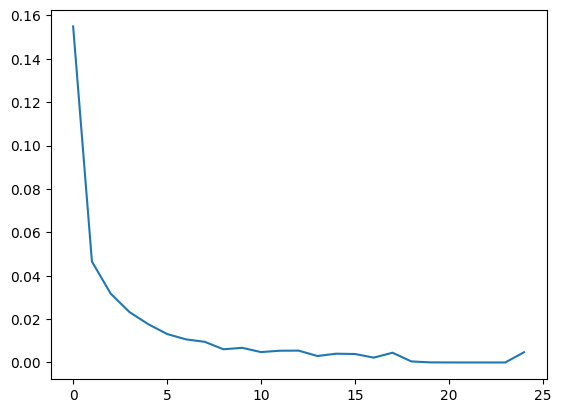

In [21]:
plt.plot(history.history['loss'])

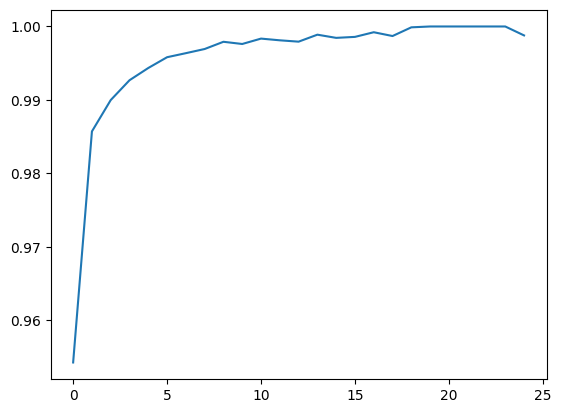

In [22]:
plt.plot(history.history['accuracy'])

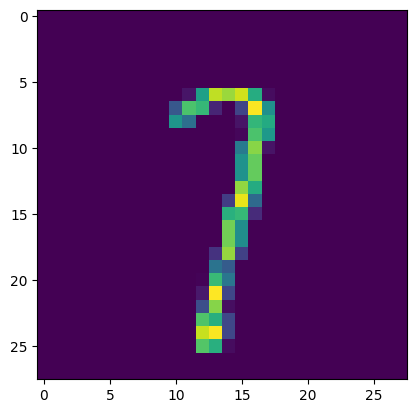

In [23]:
plt.imshow(test_images.reshape(-1, 28, 28)[175])

In [24]:
model.predict(test_images[175].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step


array([7])